# Statistiques et images

Atelier à destination des professeurs de lycée, proposé dans le cadre des journées NSI de Lorraine en 2022.

## Chargement des modules et configuration
Ce notebook est écrit en Python3 et requiert les modules: ipywidgets, ipympl et scikit-image (et consorts).

Nous les chargeons ici, et une fonction <tt>lireImage</tt> est fournie pour lire facilement une image dans n'importe quel format et la transformer en niveaux de gris.

**Important:** les pixels des images sont exprimés entre 0 (noir) et 1 (blanc)

In [9]:
# chargement des modules requis
%matplotlib widget
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpi
from ipywidgets import interact, interactive, fixed, interact_manual
import colorsys

import skimage.color as skc
import ipywidgets as ipw

# un générateur de nombres aléatoires
rng=np.random.default_rng()

# affichage des images en niveaux de gris
mpl.rc('image', cmap='gray')

# fonction de chargement d'une image et transformation en niveaux de gris
def lireImage(fname):
    ima=mpi.imread(fname) # lecture du fichier image
    if len(ima.shape)==3: # dans le cas d'une image couleur
        ima=colorsys.rgb_to_yiq(*tuple(np.transpose(ima,(2,0,1))))[0] # transformation en niveaux de gris (composante y dans la représentation yiq)
    ima = ima/255 # expression des valeurs entre 0 et 1
    return ima

## Premier exercice: Une image est un ordre improbable
Cette cellule permet de montrer que les pixels d'une image, dès lors qu'on abandonne la structure spatiale, constituent un ensemble très convaincant de données aléatoires de grande taille. 

Une image est chargée et une petite application permet de mélanger de manière aléatoire les pixels afin de s'en rendre compte.

En exercice, il est demandé d'ajouter un bouton qui permet de présenter ces pixels dans un ordre particulier: rangés dans l'ordre croissant.

**Indice:** la fonction [<code>np.ndarray.sort()</code>](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.sort.html) sera utile pour faire un tri sur place, c'est-à-dire sans créer de nouveau tableau.

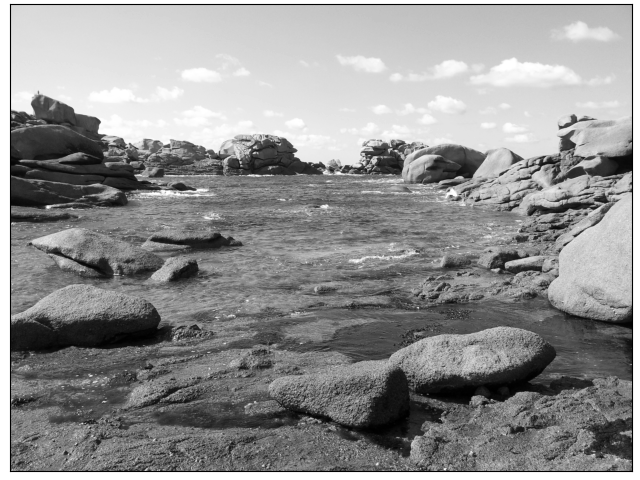

In [10]:
# lecture de l'image
ima=lireImage('accueil.jpg')

# fermeture de toutes les figures (remise à zéro des figures actives)
plt.close('all')

# préparation de la partie matplotlib de l'interface
output=ipw.Output()
# création de la figure, avec un seul sous graphique pour l'image
with output:
    fig1, iax = plt.subplots(1,1,constrained_layout=True)

# configuration du graphique image
iax.get_xaxis().set_visible(False)
iax.get_yaxis().set_visible(False)
idisp=iax.imshow(ima,vmin=0,vmax=1)

# on conserve une copie de l'image : elle sera mélangée
sima=ima.copy()

# fonction de mise à jour de l'image affichée avec la nouvelle image im
def update_image(im):
    idisp.set_data(im)
    
    
# bouton de réinitialisation de l'image à la version originale
buttonR = ipw.Button(description='Reset',tooltip="Réinitialisation de l'image")
buttonR.on_click(lambda x: update_image(ima)) # lié à une fonction qui affiche l'image originale

# bouton de mélange des pixels
# fonction pour mélanger les pixels et mettre à jour l'affichage
def shuffle_image(b):
    rng.shuffle(sima.ravel())
    update_image(sima)

# création du bouton
buttonS = ipw.Button(description='Mélange',tooltip='Mélange les pixels')
buttonS.on_click(shuffle_image) # lié à la fonction de mélange

## EXERCICE : ajouter un bouton d'affichage des valeurs ordonnées (triées) de l'image
## FIN EXERCICE

# organisation des widgets
controls=ipw.HBox([buttonR, buttonS])
ipw.VBox([controls, output])

## Deuxième exercice: la représentation sous forme d'histogramme
On reprend le code précédent, mais on ajoute à l'application une visualisation de l'histogramme de l'image. Cela se fait en ajoutant une sous-figure, qui s'appelle "axe" en langage <tt>matplotlib</tt>.

Ce calcul et affichage d'histogramme est fait dans la partie "NOUVEAU CODE" ci-dessous. On utilise la fonction <code>np.histogram()</code> qui renvoie le tableau des fréquences (<code>freq</code>), mais également les limites des classes calculées (<code>edges</code>). En effet, on fournit un nombre de classes (<code>nbins=256</code>) et la plage de valeurs est automatiquement découpées en classes de même étendue. À noter que le tableau <code>edges</code> a un élément de plus que le tableau <code>freq</code>. Par ailleurs, la somme des fréquences est normalisée à 1.

En exercice, il est demandé d'afficher, superposées à l'histogramme, la moyenne sous forme d'une ligne vertical et l'écart-type sous forme d'une ligne horizontale à mi-hauteur (entre moy-std et moy+std).

**Indice:** on pourra utiliser les fonctions [<code>np.mean()</code>](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [<code>np.std()</code>](https://numpy.org/doc/stable/reference/generated/numpy.std.html#numpy.std) pour calculer la moyenne et l'écart-type, et la fonction [<code>hax.plot()</code>](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) pour afficher une ligne.

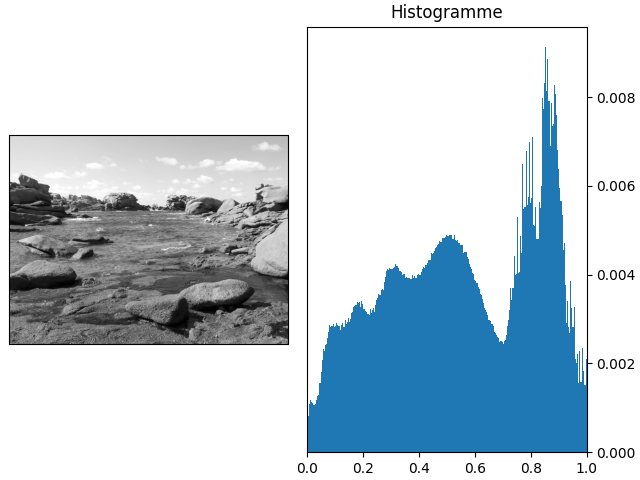

In [11]:
# reprise du code précédent
ima=lireImage('accueil.jpg')

plt.close('all')

output=ipw.Output()
with output:
    # on ajoute un deuxième graphique pour afficher l'histogramme -> hax
    fig1, (iax, hax) = plt.subplots(1,2,constrained_layout=True)
iax.get_xaxis().set_visible(False)
iax.get_yaxis().set_visible(False)
idisp=iax.imshow(ima,vmin=0,vmax=1)

sima=ima.copy()

# NOUVEAU CODE
# affichage de l'histogramme
# préparation du graphique
hax.set_title('Histogramme')
hax.yaxis.set_label_position("right")
hax.yaxis.tick_right()
hax.set_xlim([0,1]) # évite de ne se concentrer que sur la plage de probas non nulles
# calcul de l'histogramme
nbbins=256
freq,edges=np.histogram(ima.ravel(),bins=nbbins,range=(0,1))
freq = freq/np.prod(ima.shape) # on normalise pour que la somme fasse 1 -> probabilité d'occurrence
# affichage de l'histogramme : hb=objet graphique qui sera mis à jour
hb=hax.bar(edges[:-1], freq, width=np.diff(edges),align="edge")

## EXERCICE: affichage de la moyenne et de l'écart-type
## on affichera la moyenne par une ligne verticale noire et l'écart-type par une ligne horizontale à mi-hauteur 
## allant de moyenne-écart-type à moyenne+écart-type
## FIN EXERCICE

# liste de couleurs pour afficher une couleur différente à chaque fois que l'histogramme est mis à jour
colors=['red','green','blue','orange']
icol=0
# mise à jour de l'histogramme
def update_hist():
    global icol
    # calcul de l'histogramme
    im=idisp.get_array()
    freq,edges=np.histogram(im.ravel(),bins=nbbins,range=(0,1))
    freq = freq/np.prod(im.shape)
    # on change la couleur
    col=colors[icol%len(colors)]
    icol=icol+1
    # mise à jour de l'objet graphique
    for r,f,s,e in zip(hb.patches,freq,edges[:-1],edges[1:]):
        r.set(height=f,x=s,width=e-s,edgecolor=col)
# FIN NOUVEAU CODE

def update_image(im):
    idisp.set_data(im)
    update_hist() # NOUVEAU CODE: ajout de la mise à jour de l'histogramme chaque fois que l'image change
    
buttonR = ipw.Button(description='Reset',tooltip="Réinitialisation de l'image")
buttonR.on_click(lambda x: update_image(ima)) 

def shuffle_image(b):
    rng.shuffle(sima.ravel())
    update_image(sima)

buttonS = ipw.Button(description='Mélange',tooltip='Mélange les pixels')
buttonS.on_click(shuffle_image) 

controls=ipw.HBox([buttonR, buttonS])
ipw.VBox([controls, output])

## Troisième exercice: effets d'une transformation affine
On voir pouvoir observer ici l'effet d'une transformation affine quand elle est appliquée à chaque échantillon d'un ensemble. On s'intéressera à la moyenne, l'écart-type ainsi que l'histogramme et on pourra en avoir une interprétation visuelle en terme d'amélioration d'image.

On reprend le code précédent et on ajoute une nouvelle sous-figure (axe) qui sera placée à gauche de l'image. Cette figure fournit le graphe de la fonction affine. Comme les pixels sont compris entre 0 et 1, on restreint l'affichage de ce graphe à l'intervalle [0,1] à la fois en abscisse et ordonnée. 

Deux réglettes (*sliders* en anglais) sont disponibles pour ajuster la fonction affine en modifiant l'ordonnée à l'origine ainsi que la pente. À chaque modification, l'effet sur l'image est affiché et l'histogramme de la nouvelle image, ainsi que sa moyenne et écart-type, sont recalculés. Notez que même si les valeurs des pixels peuvent sortir de l'intervalle [0,1] après transformation, toute valeur négative est affichée comme 0 (noir) et toute valeur supérieure à 1 est affichée comme 1 (blanc) (effets de saturation basse et haute respectivement).

En exercice, il est demandé d'étendre la plage de visualisation de l'histogramme afin de mieux visualiser l'effet de la transformation affine sur l'histogramme. Par ailleurs, on s'aperçoit que modifier la pente changer à la fois l'écart-type et la moyenne, alors que l'ordonnée à l'origine n'a d'impact que sur la moyenne. Il est demandé de modifier l'expression (paramétrage) de la fonction affine afin que la pente n'ait d'impact que sur l'écart-type.

**Indice:** on pourra travailler sur la variable <code>hrange=(min,max)</code> qui est aussi utilisée comme paramètre de la fonction <code>np.histogram</code>

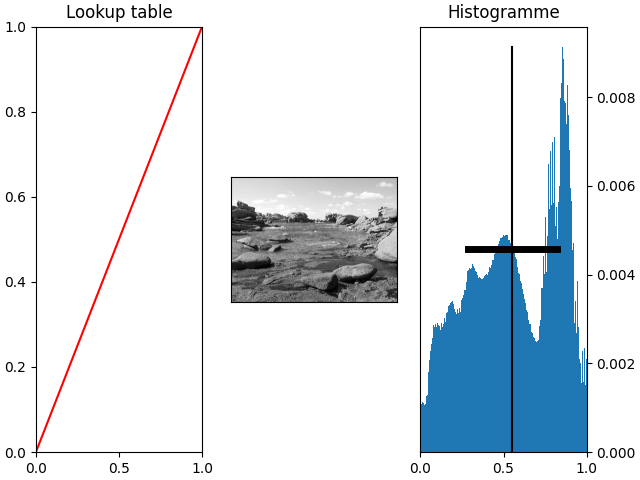

In [12]:
# reprise du code précédent
ima=lireImage('accueil.jpg')

plt.close('all')

output=ipw.Output()
with output:
    # NOUVEAU CODE: on ajoute un troisième graphique pour afficher la lookup table -> lax (sera mis en premier à gauche)
    fig1, (lax, iax, hax) = plt.subplots(1,3,constrained_layout=True)
iax.get_xaxis().set_visible(False)
iax.get_yaxis().set_visible(False)
idisp=iax.imshow(ima,vmin=0,vmax=1)

sima=ima.copy()

hax.set_title('Histogramme')
hax.yaxis.set_label_position("right")
hax.yaxis.tick_right()
hrange=(0,1)
hax.set_xlim(hrange)
## EXERCICE (1): changer l'axe des abscisses pour qu'il soit plus large, et adapté aux valeurs possibles pour les pixels de l'image quand
## on fait varier dec et mul
## FIN EXERCICE (1)

nbbins=256
freq,edges=np.histogram(ima.ravel(),bins=nbbins,range=hrange)
freq = freq/np.prod(ima.shape)
hb=hax.bar(edges[:-1], freq, width=np.diff(edges),align="edge")

imoy=np.mean(ima.ravel()) # moyenne de l'image originale
ietype=np.std(ima.ravel())
max_freq=np.max(freq)
lmoy,=hax.plot([imoy, imoy],[0,max_freq],'k-') 
letype,=hax.plot([imoy-ietype,imoy+ietype],[max_freq/2, max_freq/2],'k-',linewidth=5)

colors=['red','green','blue','orange']
icol=0
def update_hist():
    global icol
    im=idisp.get_array()
    freq,edges=np.histogram(im.ravel(),bins=nbbins,range=hrange)
    freq = freq/np.prod(im.shape)
    col=colors[icol%len(colors)]
    icol=icol+1
    for r,f,s,e in zip(hb.patches,freq,edges[:-1],edges[1:]):
        r.set(height=f,x=s,width=e-s,edgecolor=col)
        
# NOUVEAU CODE: mise à jour des infos de moyenne/écart-type
    max_freq=np.max(freq) # valeur maximale sur l'axe vertical de l'histogramme
    moy=np.mean(im.ravel()) # moyenne de l'image
    etype=np.std(im.ravel()) # écart-type de l'image
    lmoy.set_xdata([moy, moy])
    lmoy.set_ydata([0,max_freq])
    letype.set_xdata([moy-etype,moy+etype])
    letype.set_ydata([max_freq/2, max_freq/2])
# FIN NOUVEAU CODE

def update_image(im):
    idisp.set_data(im)
    update_hist() 

# NOUVEAU CODE: Lookup table -> jusqu'à la fin
v=np.linspace(0,1,256) # 256 valeurs entre 0 et 1 inclus
dec,mul=0,1 # initialisation des paramètres de la fonction affine (variables globales)

# fonction affine appliquée aux valeurs des pixels
def lut_fn(x,Dec,Mul):
    return Mul*x+Dec

## EXERCICE (2): changer la fonction ci-dessus pour que Mul n'ait un impact que sur l'écart-type et pas sur la moyenne
## FIN EXERCICE (2)

# sous-figure pour afficher la lookup table
lax.set_title('Lookup table')
lax.set_xlim(0,1) # on restreint l'affichage à un carré entre (x,y)=[0,0] et [1,1]
lax.set_ylim(0,1)
lp, =lax.plot(v,lut_fn(v,dec,mul),'r-') # création de l'objet graphique

# partie interactive
# application d'une nouvelle lookup table
def apply_lut(Dec,Mul):
    sima=lut_fn(ima,Dec,Mul) # génération de la nouvelle image
    y=lut_fn(v,Dec,Mul) # génération de la fonction affine
    update_image(sima) # mise à jour de l'image (+ histogramme)
    lp.set_ydata(y) # mise à jour de l'affichage de la LUT
    
# on retire les boutons et on ajoute les Sliders pour la valeur de dec et mul
# fonction appelée quand la valeur du slider change
def on_change_dec(change):
    global dec,mul
    dec=change['new'] # on met à jour à la variable globale dec
    apply_lut(dec,mul) # on appelle la fonction de mise à jour
# création du slider: les valeurs vont de -1 à 1 tous les 0.1 et la valeur initiale est dec
decSlider=ipw.FloatSlider(min=-1,max=1,step=0.1,value=dec, description="Ordonnée à l'origine")
# lien entre le slider et le callback
decSlider.observe(on_change_dec,names='value')

# idem pour mulSlider
def on_change_mul(change):
    global dec,mul
    mul=change['new']
    apply_lut(dec,mul)
mulSlider=ipw.FloatSlider(min=-1,max=5,step=0.1,value=mul,description='Pente')
mulSlider.observe(on_change_mul,names='value')

sliders=ipw.VBox([decSlider,mulSlider])
ipw.VBox([sliders, output])

## Quatrième exercice: Amélioration photométrique par normalisation
On passe à des cellules plus simples car sans interaction. Un affichage simple de l'image à côté de son histogramme est proposé.

Il est demandé de charger l'image <code>aqui.jpg</code> dont la visualisation est difficile. Quelle en est la valeur maximale ainsi que la valeur minimale ? Comment faire pour que les valeurs des pixels s'étendent sur tout l'intervalle [0,1] ? Quel effet sur la visualisation de l'image ?

**Indice:** on pourra utiliser les fonctions <code>a.max()</code> et <code>a.min()</code> pour obtenir les valeurs max et min sur un tableau <code>a</code>. Ce sont des alias vers les fonctions [<code>np.amax()</code>](https://numpy.org/doc/stable/reference/generated/numpy.amax.html#numpy.amax) et [<code>np.amin()</code>](https://numpy.org/doc/stable/reference/generated/numpy.amin.html#numpy.amin)

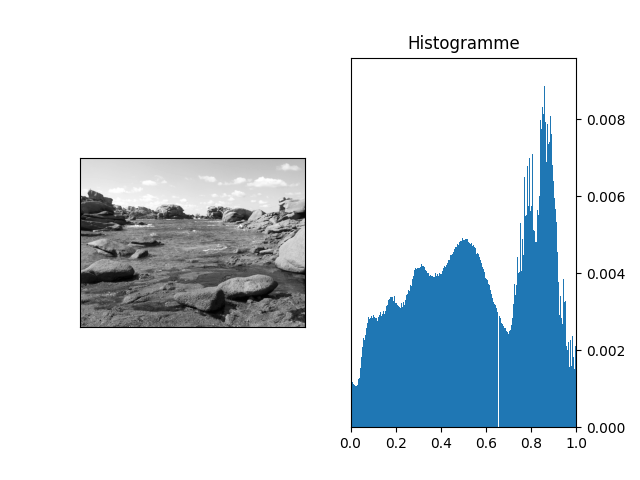

In [13]:
plt.close('all')
ima=lireImage('accueil.jpg')

## EXERCICE
## charger l'image aqui.jpg: que voit-on ?
## quelle est la valeur min dans l'image ? quelle est la valeur max ?
## la normaliser de telle manière que min->0 et max->1
## qu'observe-t-on?
## FIN EXERCICE

# calcul de l'histogramme
nbbins=256
freq,edges=np.histogram(ima.ravel(),bins=nbbins,range=(0,1))
freq = freq/np.prod(ima.shape)

# affichage
fig1, (iax, hax) = plt.subplots(1,2)
iax.get_xaxis().set_visible(False)
iax.get_yaxis().set_visible(False)
idisp=iax.imshow(ima,vmin=0,vmax=1)

hax.set_title('Histogramme')
hax.yaxis.set_label_position("right")
hax.yaxis.tick_right()
hax.set_xlim([0,1])
hb=hax.bar(edges[:-1], freq, width=np.diff(edges),align="edge")

## Cinquième exercice: Egalisation d'histogramme
On présente ici une méthode plus évoluée pour faire de l'amélioration d'image.

On va également chercher à mieux occuper toute la plage de valeur [0,1] mais en cherchant un meilleur équilibre dans la distribution des valeurs. L'objectif est d'obtenir un histogramme plat.

Première question: Remplacer l'affichage de l'histogramme par celui de l'histogramme cumulé (fonction de répartition). On pourra tirer profit de la fonction [<code>np.cumsum()</code>](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) qui calcule la somme cumulée d'un tableau. Quelle forme doit avoir cet histogramme cumulé quand l'histogramme est plat ?

Deuxième question : remplacer chaque pixel de l'image par la valeur correspondante de la fonction de répartition; en notant $F(x)$ la fonction de répartition, remplacer chaque valeur de pixel $x$ par $F(x)$ dans l'image. Qu'observe-t-on ?

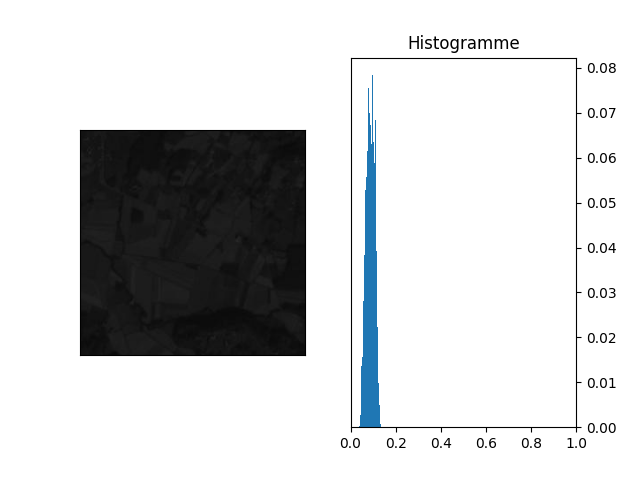

In [14]:
plt.close('all')
ima=lireImage('aqui.jpg')

nbbins=256
freq,edges=np.histogram(ima.ravel(),bins=nbbins,range=(0,1))
freq = freq/np.prod(ima.shape)
## EXERCICE (2)
## remplacer chaque valeur v dans l'image par la valeur F(v) ou F est l'histogramme cumulé. On utilisera une variable temporaire pour stocker
## la nouvelle image
## recalculer l'histogramme
## FIN EXERCICE (2)

fig1, (iax, hax) = plt.subplots(1,2)
iax.get_xaxis().set_visible(False)
iax.get_yaxis().set_visible(False)
idisp=iax.imshow(ima,vmin=0,vmax=1)

hax.set_title('Histogramme')
hax.yaxis.set_label_position("right")
hax.yaxis.tick_right()
hax.set_xlim([0,1])
hb=hax.bar(edges[:-1], freq, width=np.diff(edges),align="edge")
## EXERCICE (1)
## afficher l'histogramme cumulé au lieu de l'histogramme (cf la fonction np.cumsum). Quelle forme devrait-il avoir avec un histogramme plat?
## FIN EXERCICE (1)

## Sixième exercice: Seuillage d'une image
On passe ici à la segmentation des images par binarisation: on veut séparer un ou des objets du fond.

Une manière simple de procéder est par seuillage : on choisit une valeur <tt>seuil</tt> et on met à 0 tous les pixels sous ce seuil, et à 1 tous les pixels au-dessus. 

Un exemple est fourni ici avec un seuil à 0.7.

Question: en regardant l'histogramme, trouver une valeur de seuil plus appropriée.

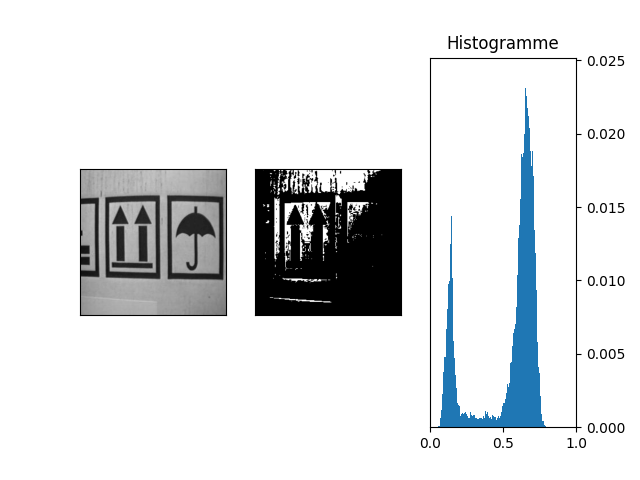

In [15]:
plt.close('all')
ima=lireImage('motifs.jpg')

# calcul de l'histogramme
nbbins=256
freq,edges=np.histogram(ima.ravel(),bins=nbbins,range=(0,1))
freq = freq/np.prod(ima.shape)

## EXERCICE: 
## en analysant l'histogramme, trouver un seuil qui permet de bien séparer les motifs du fond
## faire le même exercice en chargeant d'autres images. Est-ce toujours si simple ? Quelle forme doit avoir l'histogramme pour que cela fonctionne ?
## FIN EXERCICE

## EXERCICE (OPTIONNEL)
## pour ceux qui sont le plus à l'aise, vous pouvez vous inspirer des cellules interactives ci-dessus pour ajouter un slider qui permet d'ajuster 
## interactivement le seuil
## FIN EXERCICE (OPTIONNEL)

seuil=0.7
sima=ima.copy()
sima[ima<=seuil]=0
sima[ima>seuil]=1

# affichage: on ajoute un axe pour l'image seuillée
fig1, (iax, sax, hax) = plt.subplots(1,3)
iax.get_xaxis().set_visible(False)
iax.get_yaxis().set_visible(False)
idisp=iax.imshow(ima,vmin=0,vmax=1)

sax.get_xaxis().set_visible(False)
sax.get_yaxis().set_visible(False)
sdisp=sax.imshow(sima,vmin=0,vmax=1)

hax.set_title('Histogramme')
hax.yaxis.set_label_position("right")
hax.yaxis.tick_right()
hax.set_xlim([0,1])
hb=hax.bar(edges[:-1], freq, width=np.diff(edges),align="edge")

## Septième exercice: la méthode de seuillage par k-means (avancé, ici 2-means)

Une méthode pour automatiser la détermination de ce seuil est celle des k-means : c'est une méthode de classification non supervisée qui présuppose un nombre de classes k. Ici, on va donc considérer que k vaut 2.

L'objectif est de trouver un seuil. La méthode des 2-means cherche à déterminer la moyenne optimale pour chaque classe. Ces moyennes sont appelées "centres" pour s'adapter au cas général où les valeurs à classifier sont vectorielles. Ici ces valeurs sont des scalaires et les centres sont simplement des nombres sur le segment [0,1]. Le seuil est automatiquement calculé comme le milieu des deux centres.

La méthode choisit deux centres de manière aléatoire, c'est-à-dire deux nombres entre 0 et 1. Le plus petit nombre est le centre de la classe 0 et le plus grand celui de la classe 1. Le seuil est calculé comme la moyenne de ces deux nombres, ce qui permet d'attribuer la classe 0 aux pixels sous ce seuil et la classe 1 aux pixels au-dessus de ce seuil. La méthode indique dès lors de calculer les nouvelles valeurs moyennes de ces classes, ce qui met à jour le centre, puis le seuil. On itère ainsi jusqu'à convergence de la position du seuil (ou des centres, ce qui est équivalent).

Question: implémenter la méthode des k-means avec deux classes. On pourra faire une première version en calculant les moyennes successives à partir des pixels de l'images. Puis on pourra améliorer le temps de calcul en faisant ces mêmes calculs mais directement à partir de l'histogramme (la position des bords sera aussi nécessaire).

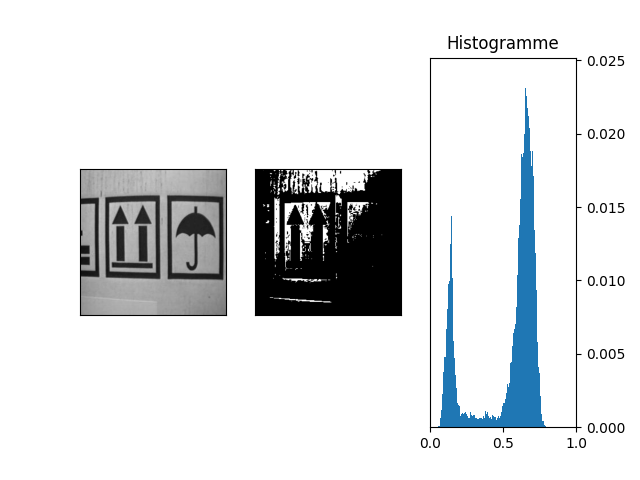

In [16]:
plt.close('all')
ima=lireImage('motifs.jpg')

# calcul de l'histogramme
nbbins=256
freq,edges=np.histogram(ima.ravel(),bins=nbbins,range=(0,1))
freq = freq/np.prod(ima.shape)

## EXERCICE: 
## programmer la méthode des k-means (k=2) pour trouver automatiquement le seuil
## on l'appellera par:
### seuil=TwoMeans1(ima) # première version
## ou
### seuil=TwoMeans2(freq,edges) # deuxième version
### print(f'seuil={seuil}')
## FIN EXERCICE

seuil=0.7
sima=ima.copy()
sima[ima<=seuil]=0
sima[ima>seuil]=1

# affichage: on ajoute un axe pour l'image seuillée
fig1, (iax, sax, hax) = plt.subplots(1,3)
iax.get_xaxis().set_visible(False)
iax.get_yaxis().set_visible(False)
idisp=iax.imshow(ima,vmin=0,vmax=1)

sax.get_xaxis().set_visible(False)
sax.get_yaxis().set_visible(False)
sdisp=sax.imshow(sima,vmin=0,vmax=1)

hax.set_title('Histogramme')
hax.yaxis.set_label_position("right")
hax.yaxis.tick_right()
hax.set_xlim([0,1])
hb=hax.bar(edges[:-1], freq, width=np.diff(edges),align="edge")

## Huitième exercice: la méthode de seuillage d'Otsu (avancé)

Otsu a proposé en 1979 (voir l'[article fourni dans l'archive](OTSU_paper.pdf)) une autre méthode de détermination automatique d'un seuil. L'idée repose sur le calcul d'un critère qui est d'autant plus petit que les deux classes sont bien séparées.

Plusieurs critères sont proposés et il est montré qu'ils sont équivalents. Je vous propose donc ici celui qui me semble le plus simple à comprendre : la variance intra-classes. Le seuil définit deux classes de pixels : ceux qui seront mis à 0 et ceux qui seront mis à 1. Pour un seuil donné, on peut donc calculer la variance sur la classe 0 et la variance sur la classe 1. Le seuil optimal sera celui qui proposera le meilleur compromis pour que ces variances soient les plus petites possibles.

Le critère qui calcule ce compromis fait la somme des variances, pondérées par leur probabilité de classe. Si $\omega_0$ est la probabilité d'appartenir à la classe 0 et $\sigma^2_0$ la variance sur cette classe, et $\omega_1$ est la probabilité d'appartenir à la classe 1, ayant $\sigma^2_1$ pour variance, le critère calculé est: $\sigma^2_w = \omega_0 \sigma^2_0 + \omega_1 \sigma^2_1$.

Le seuil recherché est celui qui minimise ce critère.

Question: implémenter la méthode d'Ostu. Pour cela, on pourra calculer le critère pour tous les seuils possibles et choisir le seuil qui correspond au critère minimal. A nouveau, une première version pourra faire les calculs à partir des pixels de l'image, mais devra utiliser l'histogramme, puis une deuxième version exploitera à profit uniquement l'histogramme de leurs valeurs (et les bords).

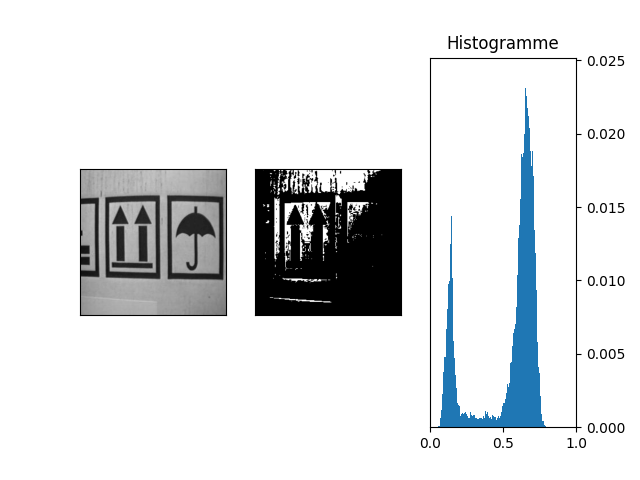

In [17]:
plt.close('all')
ima=lireImage('motifs.jpg')

# calcul de l'histogramme
nbbins=256
freq,edges=np.histogram(ima.ravel(),bins=nbbins,range=(0,1))
freq = freq/np.prod(ima.shape)

## EXERCICE: 
## programmer la méthode d'Otsu pour trouver automatiquement le seuil
## on l'appellera par:
### seuil,copt=Otsu1(freq,edges,ima) # première version
## ou
### seuil,copt=Otsu1(freq,edges) # deuxième version
### print(f'seuil={seuil}, critère={copt}')
## FIN EXERCICE

seuil=0.7
sima=ima.copy()
sima[ima<=seuil]=0
sima[ima>seuil]=1

# affichage: on ajoute un axe pour l'image seuillée
fig1, (iax, sax, hax) = plt.subplots(1,3)
iax.get_xaxis().set_visible(False)
iax.get_yaxis().set_visible(False)
idisp=iax.imshow(ima,vmin=0,vmax=1)

sax.get_xaxis().set_visible(False)
sax.get_yaxis().set_visible(False)
sdisp=sax.imshow(sima,vmin=0,vmax=1)

hax.set_title('Histogramme')
hax.yaxis.set_label_position("right")
hax.yaxis.tick_right()
hax.set_xlim([0,1])
hb=hax.bar(edges[:-1], freq, width=np.diff(edges),align="edge")